In [2]:
from hdf5storage import loadmat, savemat 
import numpy as np 
import networkx as nx
from matplotlib import pyplot as plt 

Decided to start out by reorganizing the matrices, because I kept losing track of what I was looking at. For convenience I reorganized both the partial coherence (Boolean) and coherence matrix, although I dont really know what to do with the coherence matrix. 

In [3]:
# load coh or pcoh
# dict=loadmat('../../Cleaned_data/hilbert_datacov/Pcoh_boolean.mat')
pcoh=loadmat('/data/Zhibin/Coh_networkx/Pcoh_boolean.mat')
coh = loadmat('/data/Zhibin/Coh_networkx/coh_all.mat')

In [4]:
pcoh_all = pcoh['Pcoh_boolean']
coh_all = coh['coh_all']
np.shape(pcoh_all)

(12, 2, 12, 5, 448, 448)

Everything I did was based on these notes.  If they are incorrect, then my labels are incorrect. 
% session 1-12: in time sequence [20220713;20220721;20220804;20220808;20220810;20220811;20220815;20220816;20221003;2022100401;2022100402;20221005]
% odd number sessions are synch; even number sessions are synco
% subject 1: subject L; subject 2: subject R (the paring subject)
% trial 1-3: uncouple;   trial 4-6: L-lead;    trial 7-9: R-Lead;      trial 10-12: mutual;

In [5]:
nexp = 12*2*12
task = list()
feedback = list()
counter = 0
pcoh_stack = np.zeros((nexp,5,448,448))
coh_stack = np.zeros((nexp,5,448,448)) 
for ses in range(12):
    for tr in range(12):
        for subj in range(2):
            pcoh_stack[counter,:,:,:] = pcoh_all[ses,subj,tr,:,:,:]
            coh_stack[counter,:,:,:] = coh_all[ses,subj,tr,:,:,:]
            if ses%2:
                task.append('synco')
            else:
                task.append('synch')
            if tr < 3:
                feedback.append('independent')
            elif (tr < 6):
                if subj == 0:
                    feedback.append('leader')
                else:
                    feedback.append('follower')
            elif (tr < 9):
                if subj == 1:
                    feedback.append('leader')
                else:
                    feedback.append('follower')
            else:
                feedback.append('mutual')
            counter = counter+1


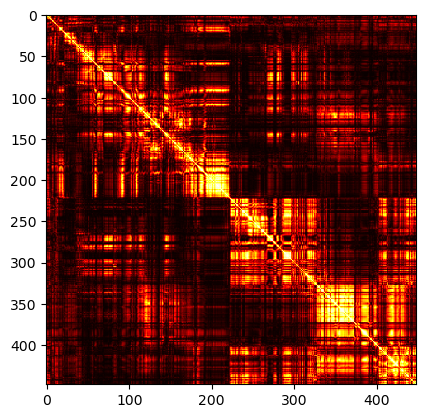

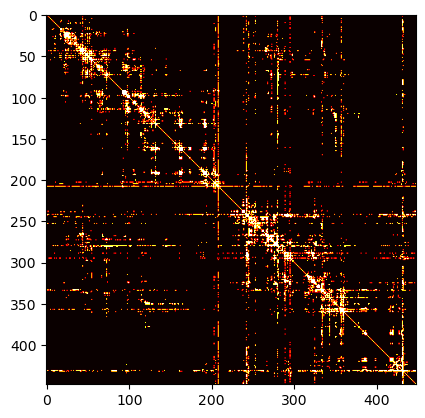

In [9]:
# just a quick check that its not all a mess
plt.imshow(coh_stack[50,2,:,:],vmin = 0, vmax = 1, cmap = 'hot')
plt.figure()
plt.imshow(pcoh_stack[50,2,:,:],vmin = 0, vmax = 1, cmap = 'hot')

I am going to build a dictionary of graph objects.

In [10]:
ngraph = nexp
nfreq = 5 
freqs = ['delta','theta','alpha','mu','beta']
dt = [('delta',int),('theta',int),('alpha',int),('mu',int),('beta',int)]

G = dict()
fG = dict()
for j in range(nfreq):
    G = dict()
    for k in range(ngraph):
        G[k] = nx.from_numpy_array(pcoh_stack[k,j,:,:])
    fG[freqs[j]] = G


In [16]:

lp = loadmat('/data/Zhibin/plot_source_ROIs/labels_positions.mat')

corti_ave_source_labl=np.squeeze(lp['corti_ave_source_labl']) # 448 index

roiNames_250=lp['roiNames_250'] # 463 text labels

node_labels = np.squeeze(roiNames_250[corti_ave_source_labl])

In [12]:
Brain = lp['Brain']
source_coor  = lp['corti_ave_source_coor']
source_label = lp['corti_ave_source_labl']
fc = lp['fc']
roiNames = lp['roiNames_250']

In [6]:
x = np.mean(pcoh_all.reshape(12*2*12,5,448,448),axis = 0)
y = np.mean(x,axis = 0)

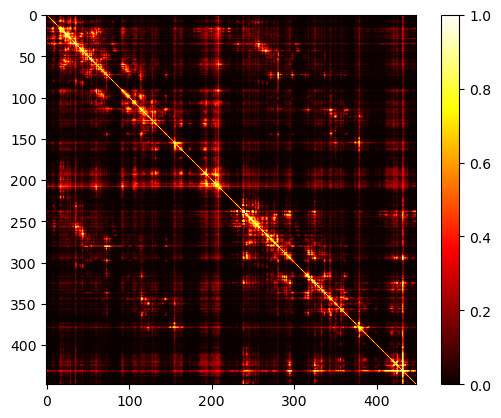

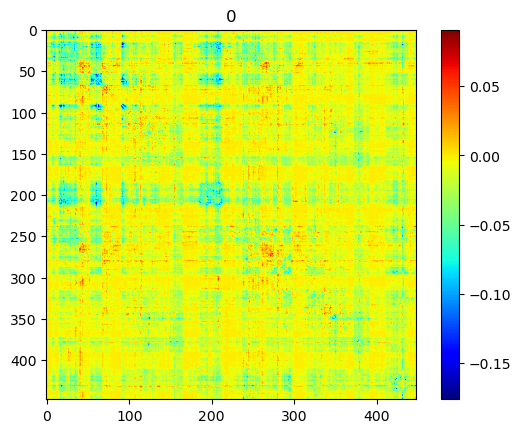

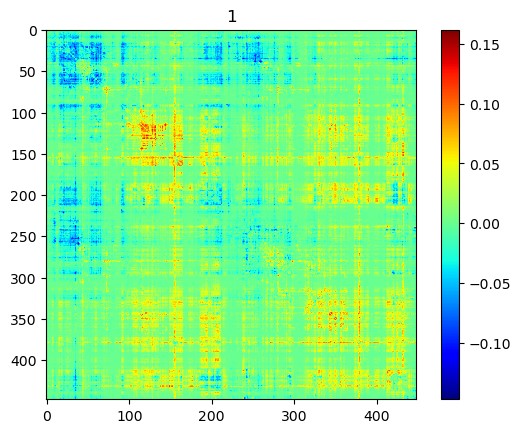

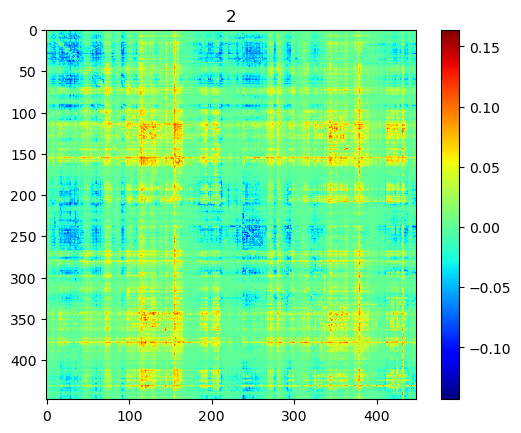

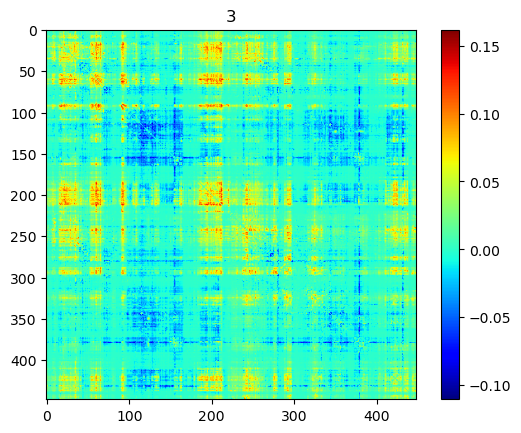

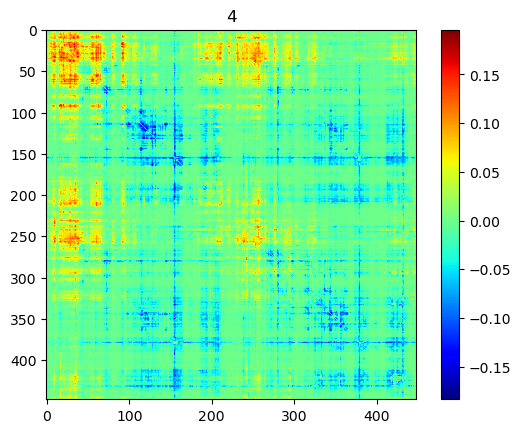

In [7]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(y,cmap = 'hot')
plt.colorbar()
for j in range(5):
    plt.figure()
    plt.imshow((x[j,:,:]-y),cmap= 'jet')
    plt.colorbar()
    plt.title(j)

In [8]:
dg_ctr_all=np.zeros((12,2,12,5,448))
for ses in range(12):
    for subj in range(2):
        for tr in range(12):
            for freq in range(5):
                G= nx.from_numpy_array(Pcoh_boolean[ses][subj][tr,freq,:,:])
                dg_ctr=nx.degree_centrality(G)
                dg_ctr_all[ses,subj,tr,freq,:]=np.array(list(dg_ctr.values()))
# 34 s


NameError: name 'Pcoh_boolean' is not defined

In [ ]:
outdict=dict()
outdict['dg_ctr_all']=dg_ctr_all
savemat('dg_ctr_all.mat',outdict)